In [1]:
print("hello world")

hello world


In [2]:
import pandas as pd
file_path = 'C:/Users/anton/OneDrive/Pulpit/Mastercard/Master/merged.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location.lat,location.long,...,country.x,signup_date,risk_score,category,country.y,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
0,TX000000,2022-06-17T23:28:00,U14804,M0314,130.03,in-store,EUR,Android,40.057938,14.959737,...,Sweden,2022-08-10,0.426675,travel,France,0.581711,3,74.97,23,1
1,TX000001,2022-01-04T15:39:00,U16634,M0675,132.00,online,EUR,Android,42.059350,1.596625,...,France,2024-05-22,0.729627,electronics,Germany,0.568933,2,56.92,23,0
2,TX000002,2022-09-09T21:58:00,U18005,M0479,8.65,online,EUR,Android,50.923432,21.795262,...,Italy,2021-05-18,0.393848,gaming,Denmark,0.608070,5,98.93,75,0
3,TX000003,2023-11-20T06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,56.833396,-9.881566,...,Portugal,2021-09-05,0.393405,electronics,Portugal,0.592656,4,21.60,82,0
4,TX000004,2022-04-28T08:08:00,U04642,M0128,101.92,in-store,EUR,Android,54.042996,2.168516,...,Austria,2023-06-01,0.524168,gaming,Spain,0.450223,4,60.61,82,0


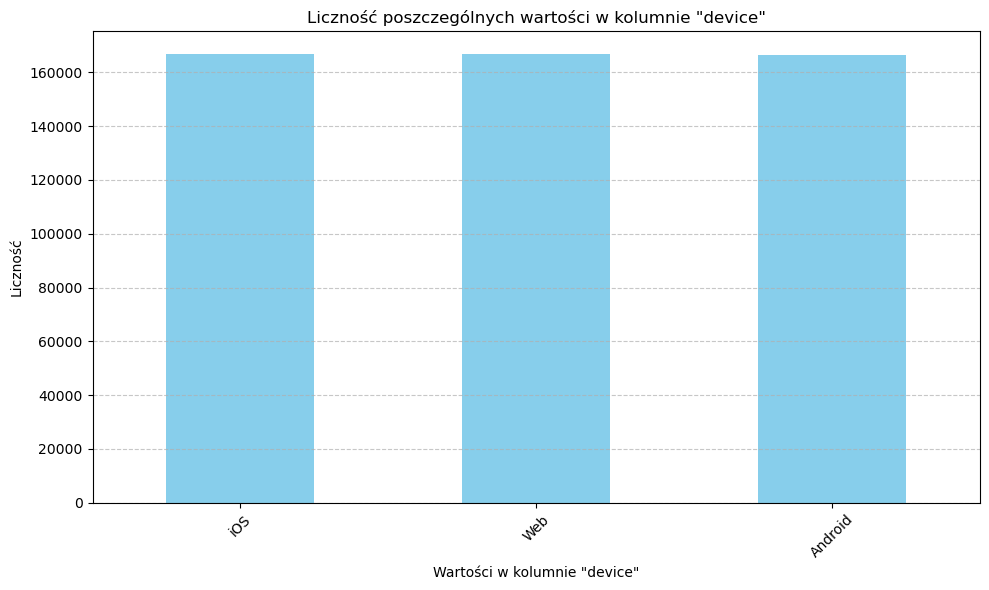

In [4]:
import matplotlib.pyplot as plt
device_counts = df['device'].value_counts()
plt.figure(figsize=(10, 6))  
device_counts.plot(kind='bar', color='skyblue') 
plt.title('Liczność poszczególnych wartości w kolumnie "device"')  
plt.xlabel('Wartości w kolumnie "device"')  
plt.ylabel('Liczność')  
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

In [4]:
file_path = 'C:/Users/anton/OneDrive/Pulpit/Mastercard/Master/merged.csv'
df = pd.read_csv(file_path)

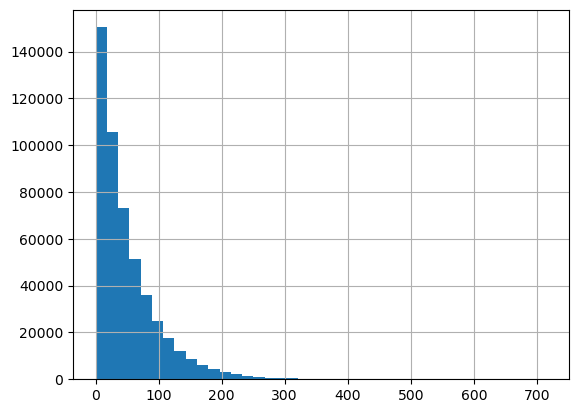

In [5]:
df['amount'].hist(bins=40)        
plt.show()

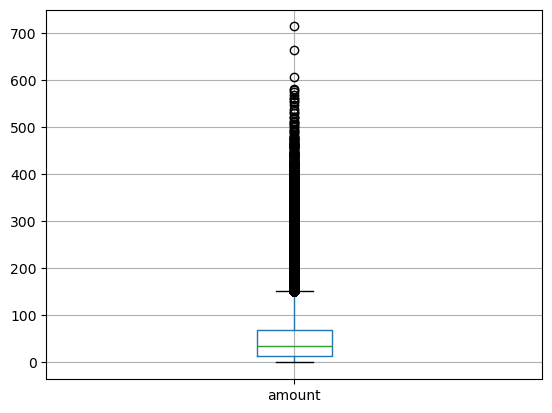

In [6]:
df.boxplot(column='amount')       
plt.show()

In [7]:
df['amount'].describe()

count    500000.000000
mean         49.915662
std          49.990657
min           0.000000
25%          14.370000
50%          34.560000
75%          69.172500
max         714.860000
Name: amount, dtype: float64

In [ ]:
q1, q3 = df['amount'].quantile([0.25, 0.75])
iqr = q3 - q1
mask_iqr = (df['amount'] < q1 - 1.5 * iqr) | (df['amount'] > q3 + 1.5 * iqr)
out_iqr = df[mask_iqr] 


In [9]:
out_iqr

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location.lat,location.long,...,country.x,signup_date,risk_score,category,country.y,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
19,TX000019,2022-01-27T23:40:00,U02026,M0618,178.94,in-store,EUR,Android,66.428428,37.342083,...,Germany,2024-10-09,0.621181,grocery,Ireland,0.825521,1,59.41,19,0
35,TX000035,2023-06-06T08:15:00,U01950,M0911,234.21,in-store,EUR,iOS,64.436523,25.306135,...,Ireland,2021-04-25,0.546949,electronics,Portugal,0.480154,1,75.64,29,0
44,TX000044,2023-04-25T21:41:00,U02179,M0801,170.49,online,EUR,iOS,42.404175,6.359049,...,Sweden,2021-06-09,0.721267,travel,Poland,0.704613,3,38.33,36,0
63,TX000063,2022-06-17T07:09:00,U12725,M0295,164.43,mobile,EUR,Web,48.887554,34.722697,...,France,2023-12-01,0.420562,electronics,Portugal,0.709546,2,72.28,83,0
64,TX000064,2023-02-10T01:55:00,U08878,M0926,169.27,in-store,EUR,iOS,44.535762,14.726616,...,Belgium,2023-07-30,0.695062,education,Netherlands,0.504992,5,181.91,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499917,TX499917,2023-09-26T11:07:00,U11774,M0317,219.84,online,EUR,Web,52.628515,16.812963,...,Sweden,2022-07-01,0.626642,restaurants,Austria,0.543413,5,27.99,103,0
499931,TX499931,2023-06-27T16:59:00,U04615,M0266,156.86,online,EUR,Web,44.968590,23.333849,...,Germany,2022-04-13,0.315743,education,France,0.677900,6,20.88,98,0
499956,TX499956,2022-06-23T08:45:00,U18254,M0797,359.07,in-store,EUR,iOS,36.226219,19.684878,...,Czech Republic,2021-12-27,0.574223,gaming,Sweden,0.388627,1,7.64,106,0
499971,TX499971,2022-03-04T04:27:00,U10744,M0544,153.84,online,EUR,Android,52.100691,1.698634,...,Czech Republic,2021-02-27,0.533412,gaming,Belgium,0.793378,5,59.69,78,1


In [ ]:
mask_z = abs(zscore(df['amount'])) > 3
mask_z = abs(zscore(df['amount'])) > 3
out_z = df[mask_z] = df[mask_z]

In [11]:
out_z

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location.lat,location.long,...,country.x,signup_date,risk_score,category,country.y,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
35,TX000035,2023-06-06T08:15:00,U01950,M0911,234.21,in-store,EUR,iOS,64.436523,25.306135,...,Ireland,2021-04-25,0.546949,electronics,Portugal,0.480154,1,75.64,29,0
77,TX000077,2022-10-23T21:33:00,U00607,M0895,203.09,in-store,EUR,Android,49.602437,15.742451,...,Germany,2021-12-31,0.603179,grocery,Italy,0.636467,0,8.97,87,0
154,TX000154,2022-01-16T21:22:00,U01157,M0167,218.82,online,EUR,Web,67.173166,32.067447,...,Belgium,2021-05-17,0.417407,clothing,Austria,0.121984,0,77.46,78,1
204,TX000204,2023-05-07T00:50:00,U01978,M0068,277.37,in-store,EUR,Web,48.652962,2.272777,...,Denmark,2022-11-06,0.572946,restaurants,Finland,0.940839,2,7.89,104,1
397,TX000397,2023-09-27T18:38:00,U13208,M0873,220.84,online,EUR,Web,67.525991,6.122674,...,Austria,2022-05-22,0.678793,education,Germany,0.708516,2,38.95,93,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499842,TX499842,2023-01-23T23:06:00,U15243,M0169,223.19,mobile,EUR,iOS,65.301852,37.285319,...,Italy,2023-09-04,0.259372,electronics,Portugal,0.298096,2,46.41,19,1
499903,TX499903,2022-12-03T18:42:00,U04823,M0899,200.43,mobile,EUR,Android,47.181699,7.345200,...,Germany,2024-11-26,0.716293,grocery,Austria,0.932095,4,38.65,37,1
499917,TX499917,2023-09-26T11:07:00,U11774,M0317,219.84,online,EUR,Web,52.628515,16.812963,...,Sweden,2022-07-01,0.626642,restaurants,Austria,0.543413,5,27.99,103,0
499956,TX499956,2022-06-23T08:45:00,U18254,M0797,359.07,in-store,EUR,iOS,36.226219,19.684878,...,Czech Republic,2021-12-27,0.574223,gaming,Sweden,0.388627,1,7.64,106,0


In [12]:
mad = stats.median_abs_deviation(df['amount'])
med = df['amount'].median()
mod_z = 0.6745 * (df['amount'] - med) / mad
mask_modz = abs(mod_z) > 3.5
out_modz = df[mask_modz] 
out_modz

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location.lat,location.long,...,country.x,signup_date,risk_score,category,country.y,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
19,TX000019,2022-01-27T23:40:00,U02026,M0618,178.94,in-store,EUR,Android,66.428428,37.342083,...,Germany,2024-10-09,0.621181,grocery,Ireland,0.825521,1,59.41,19,0
35,TX000035,2023-06-06T08:15:00,U01950,M0911,234.21,in-store,EUR,iOS,64.436523,25.306135,...,Ireland,2021-04-25,0.546949,electronics,Portugal,0.480154,1,75.64,29,0
44,TX000044,2023-04-25T21:41:00,U02179,M0801,170.49,online,EUR,iOS,42.404175,6.359049,...,Sweden,2021-06-09,0.721267,travel,Poland,0.704613,3,38.33,36,0
63,TX000063,2022-06-17T07:09:00,U12725,M0295,164.43,mobile,EUR,Web,48.887554,34.722697,...,France,2023-12-01,0.420562,electronics,Portugal,0.709546,2,72.28,83,0
64,TX000064,2023-02-10T01:55:00,U08878,M0926,169.27,in-store,EUR,iOS,44.535762,14.726616,...,Belgium,2023-07-30,0.695062,education,Netherlands,0.504992,5,181.91,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499842,TX499842,2023-01-23T23:06:00,U15243,M0169,223.19,mobile,EUR,iOS,65.301852,37.285319,...,Italy,2023-09-04,0.259372,electronics,Portugal,0.298096,2,46.41,19,1
499903,TX499903,2022-12-03T18:42:00,U04823,M0899,200.43,mobile,EUR,Android,47.181699,7.345200,...,Germany,2024-11-26,0.716293,grocery,Austria,0.932095,4,38.65,37,1
499917,TX499917,2023-09-26T11:07:00,U11774,M0317,219.84,online,EUR,Web,52.628515,16.812963,...,Sweden,2022-07-01,0.626642,restaurants,Austria,0.543413,5,27.99,103,0
499956,TX499956,2022-06-23T08:45:00,U18254,M0797,359.07,in-store,EUR,iOS,36.226219,19.684878,...,Czech Republic,2021-12-27,0.574223,gaming,Sweden,0.388627,1,7.64,106,0


In [13]:
trimmed = df['amount'].clip(lower=df['amount'].quantile(0.01),
                            upper=df['amount'].quantile(0.99))


In [14]:
trimmed

0         130.03
1         132.00
2           8.65
3          19.82
4         101.92
           ...  
499995     11.53
499996     78.01
499997     77.65
499998    221.38
499999    103.17
Name: amount, Length: 500000, dtype: float64